# attempting keras + iPy

In [1]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def plot_model(history) :
    acc      = history.history['acc']
    val_acc  = history.history['val_acc']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'bo', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [14]:
def train_model(x_train,y_train, x_val=None,y_val=None,
                do_val=0,
                hidden=[32,16],
                act='relu', opt='rmsprop',loss='mse',
                l2_reg_rate = 0.1,
                batch_size=512,
                epochs=10):
    model = models.Sequential()
    
    # fixed for IMDB
    input_size =10000
    output_size=1    

    for (indx,depth) in enumerate(hidden):
        if (indx==0):
            model.add(layers.Dense(depth, activation=act, input_shape=(input_size,),kernel_regularizer=regularizers.l2(l2_reg_rate)))
        else:
            model.add(layers.Dense(depth, activation=act,kernel_regularizer=regularizers.l2(l2_reg_rate)))
            
    # output layer
    model.add(layers.Dense(output_size, activation='sigmoid'))
    
    arch = [input_size, hidden, output_size]

    model.compile(optimizer=opt,
                  loss=loss,
                  metrics=['accuracy'])
    
    model.summary()
    
    print ("Network INFO: ")
    print ("\tLayers:",arch)
    print ("\t Hyper: act=%s opt=%s loss=%s batch_size=%d l2_reg=%f" %(act,opt,loss,batch_size,l2_reg_rate));
    if (do_val):
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val,y_val))
        plot_model(history)
    else:
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

    print ("INFO: model evaluation .. ")
    results = model.evaluate(x_test, y_test)
    return results

# IMDB

In [4]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype ('float32')

# setup the validation & training data
# ensure there's no information leak!!
x_val   = x_train[:10000]
x_train = x_train[10000:]
y_val   = y_train[:10000]
y_train = y_train[10000:]

---
## re-train a new network

With regularization: 0.0
Network INFO: 
	Layers: [10000, [1024, 1024, 1024], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512 l2_reg=0.000000
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 37s 2ms/step - loss: 0.2099 - acc: 0.7150 - val_loss: 0.1129 - val_acc: 0.8423
Epoch 2/10
15000/15000 [==============================] - 37s 2ms/step - loss: 0.0720 - acc: 0.9032 - val_loss: 0.0880 - val_acc: 0.8768
Epoch 3/10
15000/15000 [==============================] - 35s 2ms/step - loss: 0.0314 - acc: 0.9611 - val_loss: 0.0960 - val_acc: 0.8777
Epoch 4/10
15000/15000 [==============================] - 35s 2ms/step - loss: 0.0055 - acc: 0.9939 - val_loss: 0.1392 - val_acc: 0.8353
Epoch 5/10
15000/15000 [==============================] - 34s 2ms/step - loss: 0.0181 - acc: 0.9780 - val_loss: 0.0887 - val_acc: 0.8891
Epoch 6/10
15000/15000 [==============================] - 31s 2ms/step - loss: 0.0012 - acc: 0.9987 - val_loss: 0.0

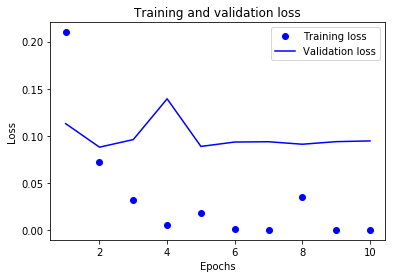

INFO: model evaluation .. 
25000/25000 [==============================] - 28s 1ms/step


[0.10267968902315945, 0.88175999999999999]

In [5]:
set_l2_reg = 0.
print ("With regularization:",set_l2_reg)
results = train_model(epochs=10,
                      hidden=[1024,1024,1024],
                      x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1,
                      l2_reg_rate=set_l2_reg
                     )
results

With regularization: 0.01
Network INFO: 
	Layers: [10000, [1024, 1024, 1024], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512 l2_reg=0.010000
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 37s 2ms/step - loss: 9.4788 - acc: 0.5725 - val_loss: 1.6052 - val_acc: 0.6071
Epoch 2/10
15000/15000 [==============================] - 33s 2ms/step - loss: 0.6581 - acc: 0.7243 - val_loss: 0.2434 - val_acc: 0.8316
Epoch 3/10
15000/15000 [==============================] - 36s 2ms/step - loss: 0.2442 - acc: 0.7889 - val_loss: 0.2104 - val_acc: 0.8572
Epoch 4/10
15000/15000 [==============================] - 35s 2ms/step - loss: 0.2257 - acc: 0.8257 - val_loss: 0.2195 - val_acc: 0.8227
Epoch 5/10
15000/15000 [==============================] - 32s 2ms/step - loss: 0.2238 - acc: 0.8267 - val_loss: 0.2090 - val_acc: 0.8510
Epoch 6/10
15000/15000 [==============================] - 33s 2ms/step - loss: 0.2144 - acc: 0.8409 - val_loss: 0.

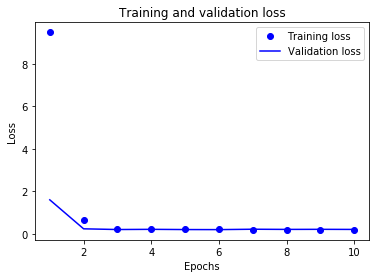

INFO: model evaluation .. 
25000/25000 [==============================] - 47s 2ms/step


[0.21916671738624574, 0.81864000000000003]

In [6]:
set_l2_reg = 0.01
print ("With regularization:",set_l2_reg)
results = train_model(epochs=10,
                      hidden=[1024,1024,1024],
                      x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1,
                      l2_reg_rate=set_l2_reg
                     )
results

With regularization: 0.001
Network INFO: 
	Layers: [10000, [1024, 1024, 1024], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512 l2_reg=0.001000
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 37s 2ms/step - loss: 1.3396 - acc: 0.6789 - val_loss: 0.4827 - val_acc: 0.7501
Epoch 2/10
15000/15000 [==============================] - 32s 2ms/step - loss: 0.2674 - acc: 0.8543 - val_loss: 0.1842 - val_acc: 0.8511
Epoch 3/10
15000/15000 [==============================] - 32s 2ms/step - loss: 0.1518 - acc: 0.8769 - val_loss: 0.1376 - val_acc: 0.8806
Epoch 4/10
15000/15000 [==============================] - 32s 2ms/step - loss: 0.1201 - acc: 0.9045 - val_loss: 0.2150 - val_acc: 0.7712
Epoch 5/10
15000/15000 [==============================] - 33s 2ms/step - loss: 0.1145 - acc: 0.9065 - val_loss: 0.1252 - val_acc: 0.8823
Epoch 6/10
15000/15000 [==============================] - 32s 2ms/step - loss: 0.1050 - acc: 0.9162 - val_loss: 0

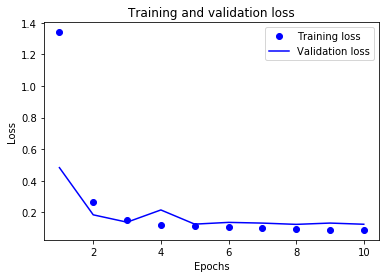

INFO: model evaluation .. 
25000/25000 [==============================] - 44s 2ms/step


[0.1281211919927597, 0.87524000000000002]

In [7]:
set_l2_reg = 0.001
print ("With regularization:",set_l2_reg)
results = train_model(epochs=10,
                      hidden=[1024,1024,1024],
                      x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1,
                      l2_reg_rate=set_l2_reg
                     )
results

With regularization: 0.0001
Network INFO: 
	Layers: [10000, [1024, 1024, 1024], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512 l2_reg=0.000100
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 36s 2ms/step - loss: 0.4218 - acc: 0.6802 - val_loss: 0.2224 - val_acc: 0.8555
Epoch 2/10
15000/15000 [==============================] - 32s 2ms/step - loss: 0.1654 - acc: 0.8895 - val_loss: 0.1574 - val_acc: 0.8688
Epoch 3/10
15000/15000 [==============================] - 31s 2ms/step - loss: 0.1039 - acc: 0.9246 - val_loss: 0.1270 - val_acc: 0.8816
Epoch 4/10
15000/15000 [==============================] - 32s 2ms/step - loss: 0.0748 - acc: 0.9457 - val_loss: 0.1699 - val_acc: 0.8180
Epoch 5/10
15000/15000 [==============================] - 32s 2ms/step - loss: 0.0605 - acc: 0.9608 - val_loss: 0.1160 - val_acc: 0.8859
Epoch 6/10
15000/15000 [==============================] - 32s 2ms/step - loss: 0.0513 - acc: 0.9673 - val_loss: 

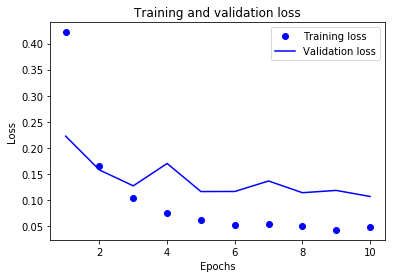

INFO: model evaluation .. 
25000/25000 [==============================] - 44s 2ms/step


[0.11048945451021194, 0.87580000000000002]

In [8]:
set_l2_reg = 0.0001
print ("With regularization:",set_l2_reg)
results = train_model(epochs=10,
                      hidden=[1024,1024,1024],
                      x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1,
                      l2_reg_rate=set_l2_reg
                     )
results

With regularization: 0
Network INFO: 
	Layers: [10000, [1024, 1024], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512 l2_reg=0.000000
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 31s 2ms/step - loss: 0.2988 - acc: 0.6423 - val_loss: 0.1065 - val_acc: 0.8576
Epoch 2/10
15000/15000 [==============================] - 28s 2ms/step - loss: 0.0838 - acc: 0.8859 - val_loss: 0.0962 - val_acc: 0.8673
Epoch 3/10
15000/15000 [==============================] - 28s 2ms/step - loss: 0.0451 - acc: 0.9415 - val_loss: 0.0808 - val_acc: 0.8914
Epoch 4/10
15000/15000 [==============================] - 27s 2ms/step - loss: 0.0236 - acc: 0.9727 - val_loss: 0.0818 - val_acc: 0.8938
Epoch 5/10
15000/15000 [==============================] - 27s 2ms/step - loss: 0.0030 - acc: 0.9969 - val_loss: 0.0851 - val_acc: 0.8892
Epoch 6/10
15000/15000 [==============================] - 27s 2ms/step - loss: 0.0229 - acc: 0.9737 - val_loss: 0.0868 - va

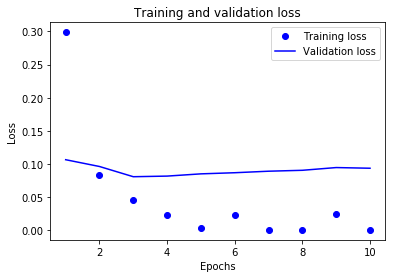

INFO: model evaluation .. 
25000/25000 [==============================] - 26s 1ms/step


[0.10250898590672761, 0.87931999999999999]

In [9]:
set_l2_reg = 0
print ("With regularization:",set_l2_reg)
results = train_model(epochs=10,
                      hidden=[1024,1024],
                      x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1,
                      l2_reg_rate=set_l2_reg
                     )
results

---

# Misc checks

## normalization

In [10]:
import numpy as np

# raw data
x = np.random.randn(10000,1)
mean_raw  = np.mean(x)
stdev_raw = np.std(x)
print ("raw mean =", mean_raw)
print ("raw stdev=",stdev_raw)

# normalize data
y = (x-mean_raw)/stdev_raw
mean_norm  = np.mean(y)
stdev_norm = np.std(y)
"""
easier way to do the above:
x -= x.mean(axis=0)
x /= x.std (axis=0)
"""

print ("nrm  mean=",mean_norm)
print ("nrm stdev=",stdev_norm)

# ensure normalized data has right distribution .. using the 'isclose' function
assert(np.isclose(mean_norm,  0.,atol=1e-16))
assert(np.isclose(stdev_norm, 1.,atol=1e-16))


raw mean = -0.00921190127597
raw stdev= 0.994123668883
nrm  mean= 9.59232693276e-18
nrm stdev= 1.0


With regularization: 0.01
Network INFO: 
	Layers: [10000, [512, 512], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512 l2_reg=0.010000
Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 17s 1ms/step - loss: 3.8832 - acc: 0.6534 - val_loss: 1.1417 - val_acc: 0.7113
Epoch 2/5
15000/15000 [==============================] - 15s 975us/step - loss: 0.6439 - acc: 0.7688 - val_loss: 0.3031 - val_acc: 0.8422
Epoch 3/5
15000/15000 [==============================] - 14s 959us/step - loss: 0.2461 - acc: 0.8071 - val_loss: 0.1949 - val_acc: 0.8559
Epoch 4/5
15000/15000 [==============================] - 14s 956us/step - loss: 0.2005 - acc: 0.8298 - val_loss: 0.1911 - val_acc: 0.8448
Epoch 5/5
15000/15000 [==============================] - 14s 947us/step - loss: 0.1917 - acc: 0.8392 - val_loss: 0.1742 - val_acc: 0.8683


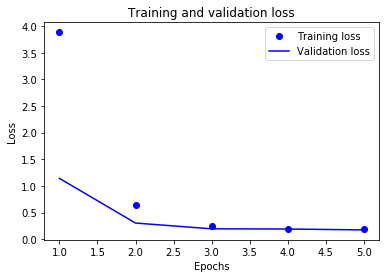

INFO: model evaluation .. 
25000/25000 [==============================] - 18s 739us/step


[0.17580257146358491, 0.86719999999999997]

In [11]:
set_l2_reg = 0.01
print ("With regularization:",set_l2_reg)
results = train_model(epochs=5,
                      hidden=[512,512],
                      x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1,
                      l2_reg_rate=set_l2_reg
                     )
results